In [4]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

data = files.upload()

Saving weather_prediction_dataset.csv to weather_prediction_dataset.csv


In [5]:
df = pd.read_csv(io.StringIO(data['weather_prediction_dataset.csv'].decode('utf-8')))
df.head()
df.info()
df = df.dropna()

df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)

In [6]:
df.dtypes

df.describe(include='all')

DATE        MONTH  BASEL_cloud_cover  BASEL_humidity  \
count  3.654000e+03  3654.000000        3654.000000     3654.000000   
mean   2.004568e+07     6.520799           5.418446        0.745107   
std    2.874287e+04     3.450083           2.325497        0.107788   
min    2.000010e+07     1.000000           0.000000        0.380000   
25%    2.002070e+07     4.000000           4.000000        0.670000   
50%    2.004567e+07     7.000000           6.000000        0.760000   
75%    2.007070e+07    10.000000           7.000000        0.830000   
max    2.010010e+07    12.000000           8.000000        0.980000   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
count     3654.000000             3654.000000          3654.000000   
mean         1.017876                1.330380             0.234849   
std          0.007962                0.935348             0.536267   
min          0.985600                0.050000             0.000000   
25%          1.013300                0.530000             0.000000   
50%          1.017700                1.110000             0.000000   
75%          1.022700                2.060000             0.210000   
max          1.040800                3.550000             7.570000   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
count     3654.000000      3654.000000     3654.000000  ...   
mean         4.661193        11.022797        6.989135  ...   
std          4.330112         7.414754        6.653356  ...   
min          0.000000        -9.300000      -16.000000  ...   
25%          0.500000         5.300000        2.000000  ...   
50%          3.600000        11.400000        7.300000  ...   
75%          8.000000        16.900000       12.400000  ...   
max         15.300000        29.000000       20.800000  ...   

       STOCKHOLM_temp_min  STOCKHOLM_temp_max  TOURS_wind_speed  \
count         3654.000000         3654.000000       3654.000000   
mean             5.104215           11.470635          3.677258   
std              7.250744            8.950217          1.519866   
min            -19.700000          -14.500000          0.700000   
25%              0.000000            4.100000          2.600000   
50%              5.000000           11.000000          3.400000   
75%             11.200000           19.000000          4.600000   
max             21.200000           32.900000         10.800000   

       TOURS_humidity  TOURS_pressure  TOURS_global_radiation  \
count     3654.000000     3654.000000             3654.000000   
mean         0.781872        1.016639                1.369787   
std          0.115572        0.018885                0.926472   
min          0.330000        0.000300                0.050000   
25%          0.700000        1.012100                0.550000   
50%          0.800000        1.017300                1.235000   
75%          0.870000        1.022200                2.090000   
max          1.000000        1.041400                3.560000   

       TOURS_precipitation  TOURS_temp_mean  TOURS_temp_min  TOURS_temp_max  
count          3654.000000      3654.000000     3654.000000     3654.000000  
mean              0.186100        12.205802        7.860536       16.551779  
std               0.422151         6.467155        5.692256        7.714924  
min               0.000000        -6.200000      -13.000000       -3.100000  
25%               0.000000         7.600000        3.700000       10.800000  
50%               0.000000        12.300000        8.300000       16.600000  
75%               0.160000        17.200000       12.300000       22.400000  
max               6.200000        31.200000       22.600000       39.800000  

[8 rows x 165 columns]

In [7]:
df_basel = pd.concat([df.iloc[:,:2],df.iloc[:,2:11]],axis=1)

In [8]:
df_basel.drop(['MONTH','DATE'],axis=1).describe()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
count        3654.000000     3654.000000     3654.000000   
mean            5.418446        0.745107        1.017876   
std             2.325497        0.107788        0.007962   
min             0.000000        0.380000        0.985600   
25%             4.000000        0.670000        1.013300   
50%             6.000000        0.760000        1.017700   
75%             7.000000        0.830000        1.022700   
max             8.000000        0.980000        1.040800   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
count             3654.000000          3654.000000     3654.000000   
mean                 1.330380             0.234849        4.661193   
std                  0.935348             0.536267        4.330112   
min                  0.050000             0.000000        0.000000   
25%                  0.530000             0.000000        0.500000   
50%                  1.110000             0.000000        3.600000   
75%                  2.060000             0.210000        8.000000   
max                  3.550000             7.570000       15.300000   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  
count      3654.000000     3654.000000     3654.000000  
mean         11.022797        6.989135       15.536782  
std           7.414754        6.653356        8.721323  
min          -9.300000      -16.000000       -5.700000  
25%           5.300000        2.000000        8.700000  
50%          11.400000        7.300000       15.800000  
75%          16.900000       12.400000       22.300000  
max          29.000000       20.800000       38.600000

<ipython-input-45-60abb3b0fb8a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_basel['BASEL_temp_mean'])


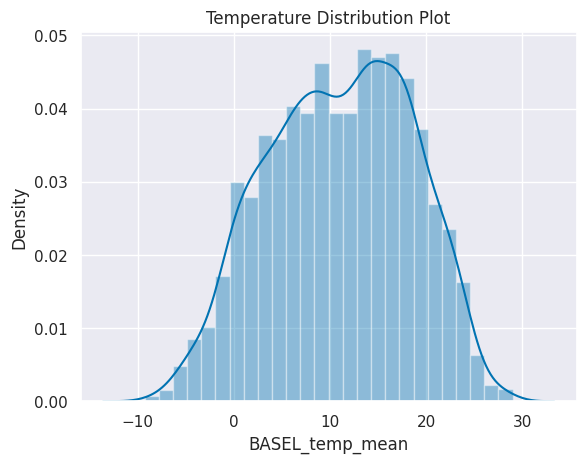

In [45]:
plt.title('Temperature Distribution Plot')
sns.distplot(df_basel['BASEL_temp_mean'])
plt.show()

<Axes: xlabel='BASEL_global_radiation', ylabel='Count'>

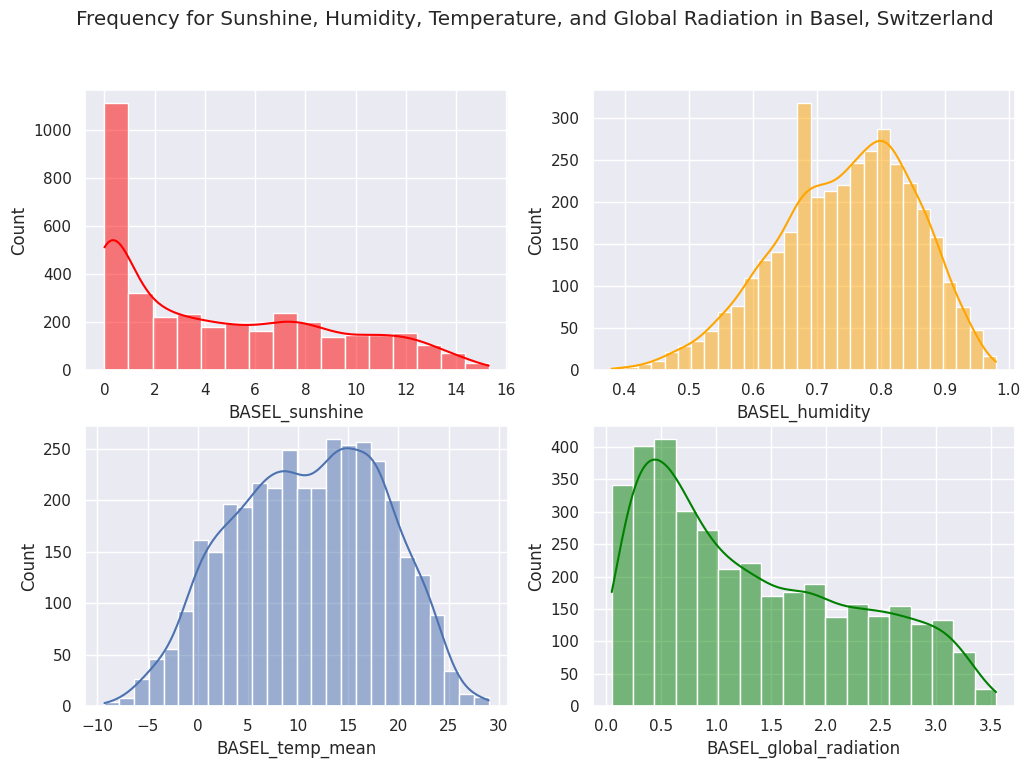

In [11]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(12,8))
fig.suptitle('Frequency for Sunshine, Humidity, Temperature, and Global Radiation in Basel, Switzerland')
sns.histplot(data = df_basel, x ='BASEL_sunshine', ax=axs[0,0], color='red', kde=True)
sns.histplot(data = df_basel, x ='BASEL_humidity', ax=axs[0,1], color='orange', kde=True)
sns.histplot(data = df_basel, x ='BASEL_temp_mean', ax=axs[1,0], kde=True)
sns.histplot(data = df_basel, x ='BASEL_global_radiation', ax=axs[1,1], color='green', kde=True)

In [12]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.heatmap(df_basel.corr(),annot=True,cmap='coolwarm').set(title='Correlation between features')

[Text(0.5, 1.0, 'Correlation between features')]

In [13]:
sns.set_palette('colorblind')
sns.pairplot(data=df_basel, height=3)

In [65]:
X = df_basel[['BASEL_global_radiation','BASEL_temp_min','BASEL_temp_max','BASEL_sunshine']]
y = df_basel['BASEL_temp_mean']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
y_predict = regressor.fit(X_train, y_train).predict(X_test)

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.xlabel('Actual Temp')
plt.ylabel('Predicted Temp')
plt.title('Actual vs. Predicted Temp')
plt.grid(True)

plt.show()

In [68]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
print(mse)

0.31969197018391654


In [50]:
#Coefficient of determination or R^2
variance = y.var()
1-mse/variance

0.9941701350050144

In [69]:
df_basel_more = pd.concat([df.iloc[:,:2],df.iloc[:,2:30]],axis=1)
df_basel_more.drop(['MONTH','DATE'],axis=1).describe()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
count        3654.000000     3654.000000     3654.000000   
mean            5.418446        0.745107        1.017876   
std             2.325497        0.107788        0.007962   
min             0.000000        0.380000        0.985600   
25%             4.000000        0.670000        1.013300   
50%             6.000000        0.760000        1.017700   
75%             7.000000        0.830000        1.022700   
max             8.000000        0.980000        1.040800   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
count             3654.000000          3654.000000     3654.000000   
mean                 1.330380             0.234849        4.661193   
std                  0.935348             0.536267        4.330112   
min                  0.050000             0.000000        0.000000   
25%                  0.530000             0.000000        0.500000   
50%                  1.110000             0.000000        3.600000   
75%                  2.060000             0.210000        8.000000   
max                  3.550000             7.570000       15.300000   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BUDAPEST_cloud_cover  \
count      3654.000000     3654.000000     3654.000000           3654.000000   
mean         11.022797        6.989135       15.536782              4.890531   
std           7.414754        6.653356        8.721323              2.386442   
min          -9.300000      -16.000000       -5.700000              0.000000   
25%           5.300000        2.000000        8.700000              3.000000   
50%          11.400000        7.300000       15.800000              5.000000   
75%          16.900000       12.400000       22.300000              7.000000   
max          29.000000       20.800000       38.600000              8.000000   

       ...  DE_BILT_wind_speed  DE_BILT_wind_gust  DE_BILT_humidity  \
count  ...         3654.000000        3654.000000       3654.000000   
mean   ...            3.395293           9.986316          0.817882   
std    ...            1.422020           3.582408          0.097465   
min    ...            0.700000           2.000000          0.370000   
25%    ...            2.300000           7.000000          0.760000   
50%    ...            3.200000          10.000000          0.830000   
75%    ...            4.200000          12.000000          0.890000   
max    ...           10.300000          28.000000          1.000000   

       DE_BILT_pressure  DE_BILT_global_radiation  DE_BILT_precipitation  \
count       3654.000000               3654.000000            3654.000000   
mean           1.015299                  1.190903               0.236888   
std            0.009861                  0.870267               0.459495   
min            0.973200                  0.110000               0.000000   
25%            1.009400                  0.410000               0.000000   
50%            1.015700                  1.020000               0.010000   
75%            1.021700                  1.860000               0.290000   
max            1.044900                  3.410000               4.250000   

       DE_BILT_sunshine  DE_BILT_temp_mean  DE_BILT_temp_min  DE_BILT_temp_max  
count       3654.000000         3654.00000       3654.000000       3654.000000  
mean           4.744444           10.70353          6.397099         14.798604  
std            3.995637            6.19077          5.639597          7.210740  
min            0.000000           -7.90000        -14.400000         -4.700000  
25%            1.100000            6.20000          2.300000          9.200000  
50%            4.100000           11.00000          6.800000         14.900000  
75%            7.500000           15.50000         10.800000         20.200000  
max           15.500000           26.90000         20.800000         35.700000  

[8 rows x 28 columns]

In [71]:
plt.figure(figsize=(36,12))
sns.set(style="darkgrid")
sns.heatmap(df_basel_more.corr(),annot=True,cmap='coolwarm').set(title='Correlation between features')

[Text(0.5, 1.0, 'Correlation between features')]

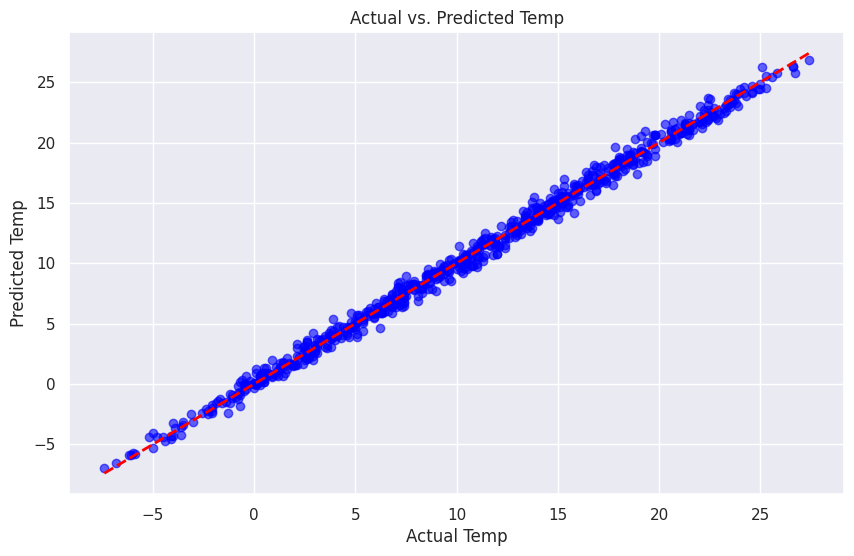

0.3034866268322562


0.9944799109096552

In [70]:
X = df_basel_more[['BASEL_global_radiation','BASEL_temp_min','BASEL_temp_max','BASEL_sunshine', 'BUDAPEST_humidity', 'BUDAPEST_global_radiation','BUDAPEST_temp_mean','BUDAPEST_temp_max','BUDAPEST_sunshine', 'DE_BILT_global_radiation', 'DE_BILT_temp_mean','DE_BILT_temp_min','DE_BILT_temp_max']]
y = df_basel_more['BASEL_temp_mean']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
regressor = LinearRegression()
y_predict = regressor.fit(X_train, y_train).predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.xlabel('Actual Temp')
plt.ylabel('Predicted Temp')
plt.title('Actual vs. Predicted Temp')
plt.grid(True)

plt.show()
mse = mean_squared_error(y_test, y_predict)
print(mse)
variance = y.var()
1-mse/variance